# ***Exploração de Dados referente a uma tabela de Análise de Crédito.***

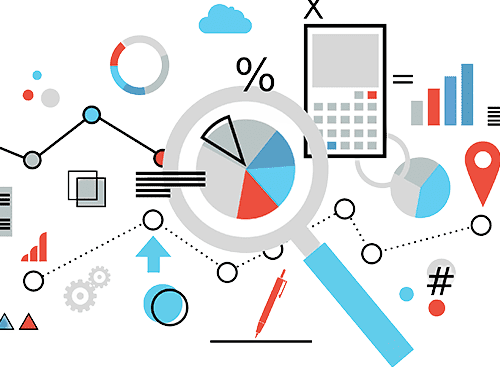

---

# **Tópicos:**
1. Contexto do Projeto;
2. Informações dos Dados;
3. Análise Exploratória;

---

# 1. Contexto do **Projeto**

* A tabela foi concedida por um dos instrutores do curso que realizei na EBAC(Escola Britânica de Artes e Ciências) chamado André Perez, que aliás é bem renomado na área de **Ciência de dados.** https://github.com/andre-marcos-perez/ebac-course-utils
* Essa **tabela** contém diversas informações sobre clientes de uma determinada Instituição Financeira não especificada.
* As informações são de suma importância para analisar a **concessão de crédito** para os clientes.

# 2. Informações dos **Dados** presentes na tabela:
* idade = idade do cliente
* sexo = sexo do cliente (F ou M)
* dependentes = número de dependentes do cliente
* escolaridade = nível de escolaridade do clientes
* salario_anual = faixa salarial do cliente
* tipo_cartao = tipo de cartao do cliente
* qtd_produtos = quantidade de produtos comprados nos últimos 12 meses
* iteracoes_12m = quantidade de iterações/transacoes nos ultimos 12 meses
* meses_inativo_12m = quantidade de meses que o cliente ficou inativo
* limite_credito = limite de credito do cliente
* valor_transacoes_12m = valor das transações dos ultimos 12 meses
* qtd_transacoes_12m = quantidade de transacoes dos ultimos 12 meses

# 3. Tipos dos dados:
  * `idade` int,
  * `sexo` string,
  * `dependentes` int,
  * `escolaridade` string,
  * `estado_civil` string,
  * `salario_anual` string,
  * `tipo_cartao` string, 
  * `qtd_produtos` bigint,
  * `iteracoes_12m` int,
  * `meses_inativo_12m` int,
  * `limite_credito` float,
  * `valor_transacoes_12m` float,
  * `qtd_transacoes_12m` int 

# 4. *Análise Exploratória dos Dados*:
> Para realizar a Análise utilizei uma plataforma online de exploração de dados, o **SQL OnLine IDE**, segue o link: https://sqliteonline.com/

---

# QUERY 1: TABELA GERAL
> Com o Intuito de vizualizar todas as informações presentes na tabela de maneira geral irei utilizar o seguinte comando:

```sql
select * 
from credit_analysis 
```

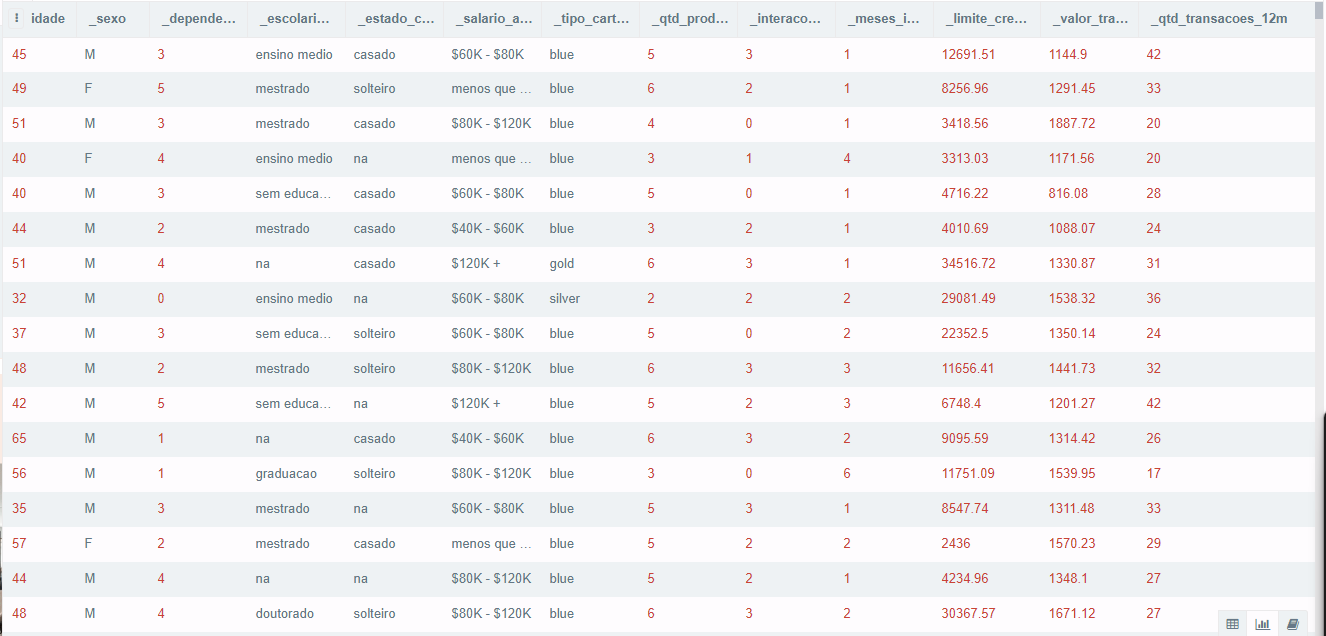

É possível observar **todos** os dados brutos da tabela de análise de crédito apresentada

---

# QUERY 2: Quantidade de Dados:
> Para saber quantos clientes estão presentes na tabela utilizarei:

```sql
select count(*) 
from credit_analysis
```

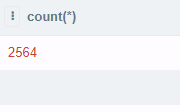

Está presente na tabela **2564** clientes na base.

---

# QUERY 3: Top 5 Limites:
> Como eu quero descobrir quais são os 5 clientes com maiores limites de crédito na tabela executarei o comando:

```sql
select * 
from credit_analysis
order by _limite_credito desc
limit 5



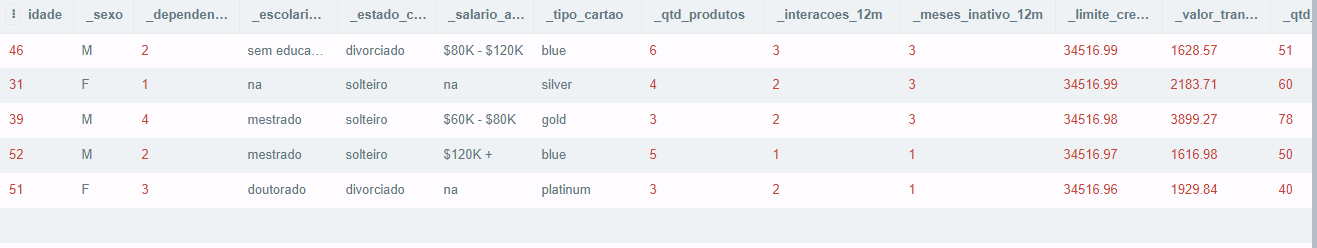


>Muito curioso ver que a maioria dos clientes com **maiores limites** são **solteiros** e do sexo **masculino**. É possivel analisar também que esses clientes possuem uma idade mais elevada, com uma média de **44 anos**.

---

#QUERY 4: Os 5 Menores limites
>Seguindo a mesma lógica da Query anterior, vamos descobrir os menores limites da tabela e ver se achamos alguma relação entre os dados.
```sql
select * 
from credit_analysis
order by _limite_credito asc
limit 5
```

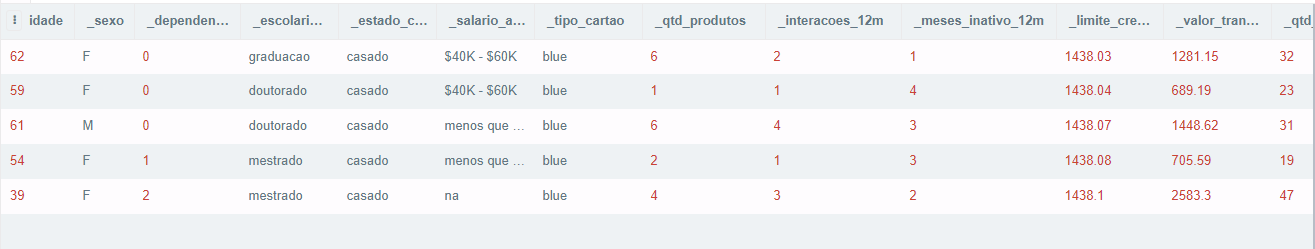

> Ao contrário do que foi apresentado na Query anterior todos os clientes são **casados** e a maioria do **sexo feminino**, o que possívelmente pode indicar uma **desigualdade salarial** entre homens e muheres. Outra informação presente nesse resultado foi que todos os tipos de cartão são **blue**.

# QUERY 5: Média de limite por Sexo:
> Agora vamos descobrir qual a média de limite concedido pela instituição financeira por sexo

```sql
select _sexo, avg(_limite_credito) as média_LimiteCrédito_por_sexo
from credit_analysis
GROUP by _sexo




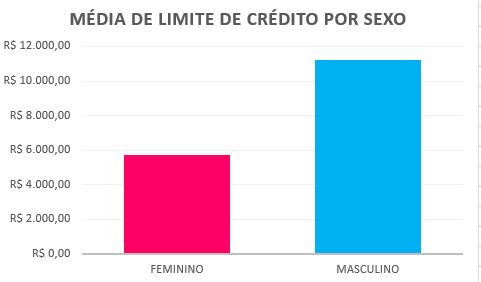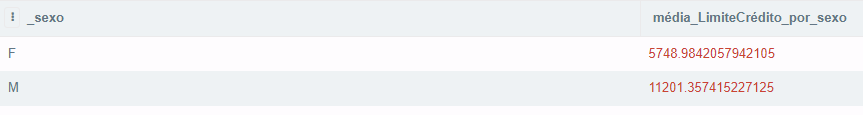



>Interessante analisar que clientes do sexo **masculino** possuem um limite médio bem superior aos clientes do sexo **feminino**.

---

# QUERY 6: A base de clientes por sexo e a média de idade:
> Afim de conhecer um pouco mais sobre a base de clientes do banco para descobrir o público alvo iremos executar um comando para descobrirmos a porcentagem de clientes por sexo e a média de idade dos mesmos:

```sql
select _sexo, count(_sexo) as clientes, avg(idade)
from credit_analysis
group by _sexo


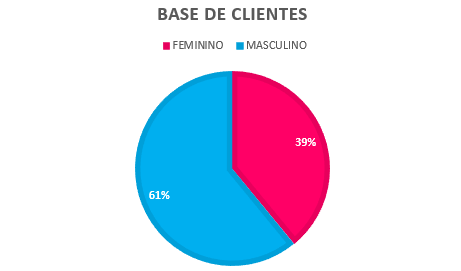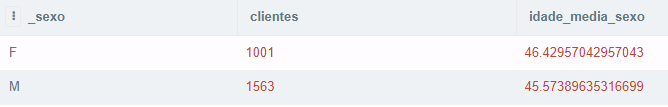


> É interessante observar que a maioria dos clientes são do sexo **masculino** e ambos os sexos possuem uma **idade média** muito próximas uma da outra, no entanto podemos afirmar que a faixa etária média do banco é em volta dos **46 anos** de idade.

---

# QUERY 7: Limite concedido médio por grau de escolaridade:

> Afim de saber se clientes com um grau de escolaridade maior possui um limite maior executarei o seguinte comando:
```sql
select _escolaridade, avg(_limite_credito) as media_limite_credito
from credit_analysis
GROUP by _escolaridade
ORDER by media_limite_credito desc


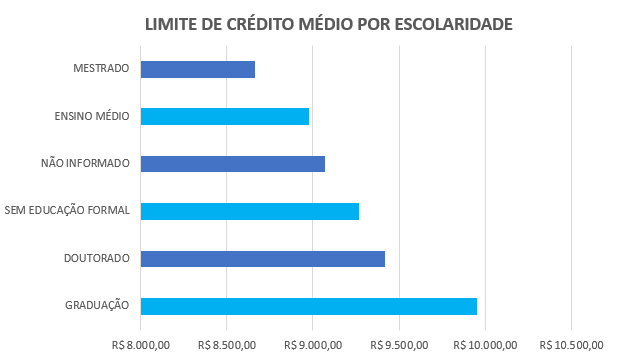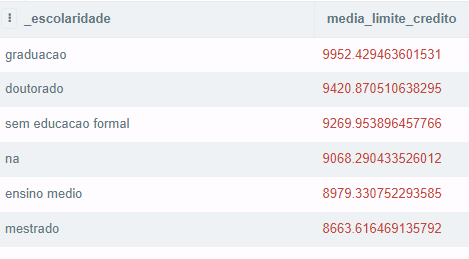


 >Pode-se observar que o grau de escolaridade dos clientes **não possuem** muita relação com o limite dado a eles. Podemos utilizar de exemplo a categoria de pessoas **sem educação formal** possuem um limite maior que pessoas com **mestrado.**


---

# QUERY 8: Salário anual e Transações realizadas durante o ano

>Agora faremos uma análise baseada no **salário anual** dos clientes. Vamos ver se quanto **maior** o salário do cliente for, **mais** será seu valor/quantidade transacionada na instituição. Para isso deixaremos de fora clientes que não possuem salário definido **(na)**.
```sql
SELECT _salario_anual, avg(_valor_transacoes_12m) as media_valor_transacoes12meses, avg(_qtd_transacoes_12m) as media_quantidade_transacoes12meses
FROM credit_analysis
where _salario_anual != 'na'
group by _salario_anual
order by media_valor_transacoes12meses desc


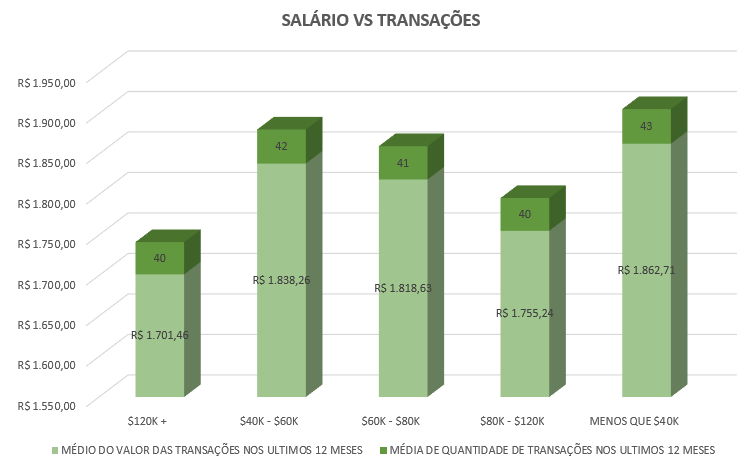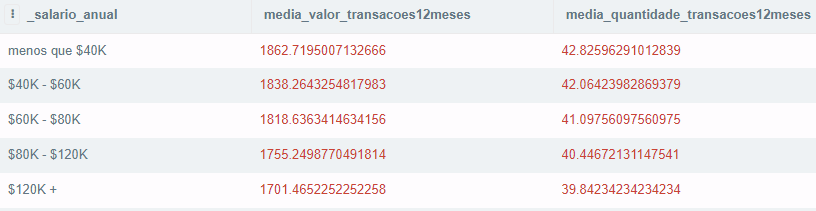

> Foi possível notar que a categoria salarial que possui maior movimento médio na instituição foram aqueles que possuem um salário anual de **menos de 40 mil** reais, o **menor** grupo da tabela. Ou seja, não é porque um cliente possui um alto salário que ele vai consequentemente realizar maiores transações.

---

# QUERY 9: Conhecendo a Frequência dos Clientes
> Com o intuito de conhecer mais a nossa base de clientes e ver um pouco sobre a **atividade** dos mesmos, produziremos uma query para saber como está essa **frequência e interação** dos usuários na instituição financeira. Para isso utilizarei a coluna de **meses inativos**.
```sql
select count(_meses_inativo_12m) as Base_Clientes, avg(_meses_inativo_12m) as Média_de_inatividade_usuário,
CASE
when _meses_inativo_12m > 3 then 'Usuário pouco ativo'
when En _meses_inativo_12m <= 3 then 'Usuário ativo'
END
as Frequencia_Usuário
from credit_analysis
GROUP by Frequencia_Usuário
```

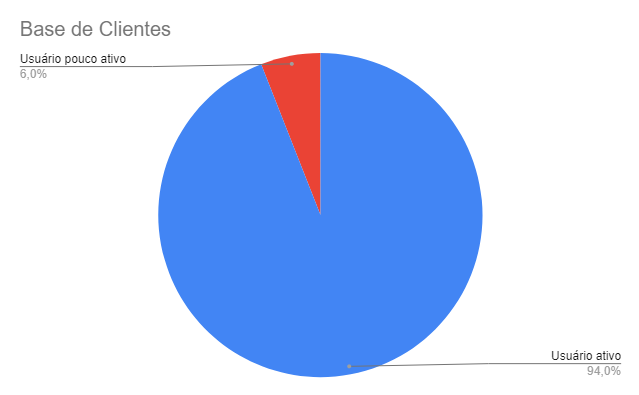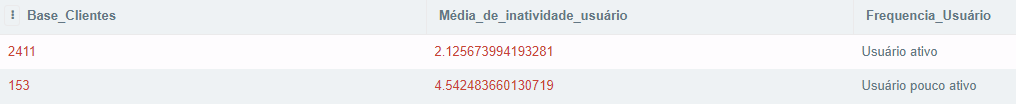

> Pode se observar que essa base de clientes é **bem ativa**, sendo composta de apenas 6% de Usuários com **baixa frequência** na instituição. A Média de **inatividade** por usuário também é baixa.

---

# QUERY 10: Limite de Crédito com base no tipo de Cartão:
>Agora para saber se o limite de crédito oferecido se correlaciona com o tipo de cartão do cliente utilizarei a seguinte Query:
```sql
SELECT _tipo_cartao, avg(_limite_credito) as Média_limite_Crédito, avg(_valor_transacoes_12m) as Média_Valor_Transacionado_12meses
from credit_analysis
GROUP by _tipo_cartao
ORDER by avg(_limite_credito) desc
```


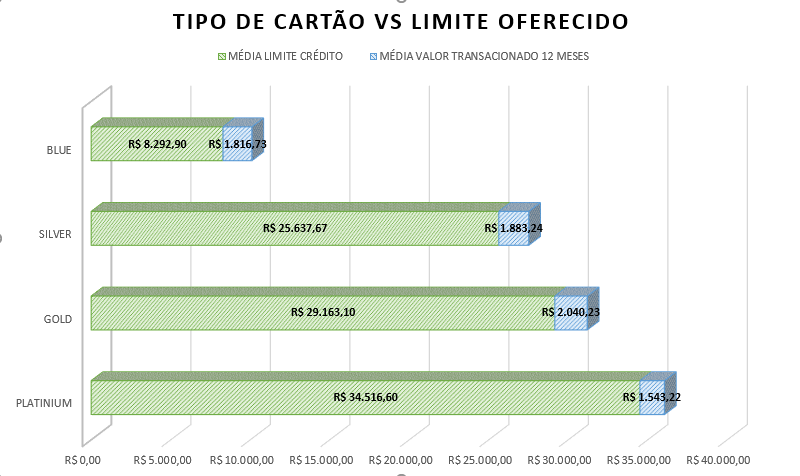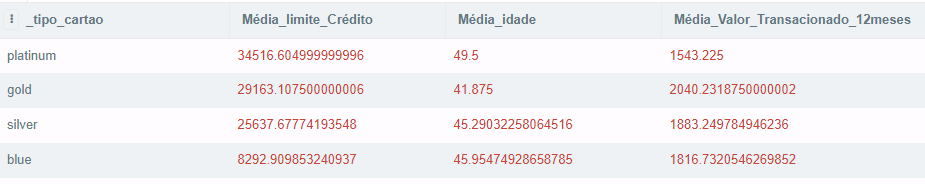

>Considerando a ordem de melhores cartões: ***Platinum, Gold, Silver e blue*** podemos chegar a uma conclusão que o **tipo do cartão** se correlaciona diretamente com o **limite de crédito médio** ofertado pela instituição. Porém vemos também que não significa que porque o **limite** oferecido é alto que a média de cliente realiza **altas transações** durante o ano. A **média de idade** também pode ser observada em mais uma query para confirmar a tese de que uma idade elevada pode **favorecer** no limite.  

---

# **Conclusão:**
* A Tabela possui informações de **2.564** clientes.

* Clientes com maiores limites são **solteiros** e do **sexo masculino**.

* Clientes com menores limites são **casados** e a maioria do sexo **feminino** com 
cartão **blue**.

* Clientes do sexo **masculino** possuem um limite médio bem superior aos clientes do sexo **feminino**.

* A base de clientes geral da instituição é formada majoritariamente por **homens** e a média de idade próximo a **46 anos** de idade.

* A **escolaridade** dos clientes não possuem muita relação com o **limite de crédito** dado a eles. 

* Clientes que possuem um salário anual de menos de **40 mil reais** representaram maior movimentação média, o menor grupo salarial da tabela.

* A base dos clientes é **bem ativa**, sendo composta de apenas **6%** de Usuários com **baixa frequência.**

* O tipo do cartão se **correlaciona** diretamente com o **limite de crédito médio** ofertado pela instituição.

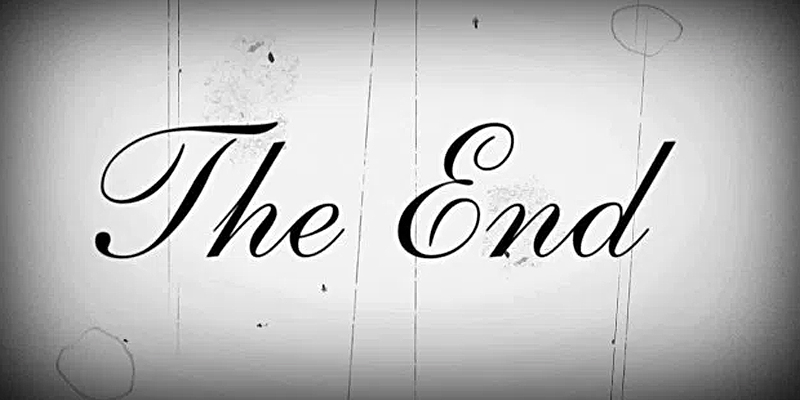